In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [219]:
#Parte 4.1 – Correção e Leitura do Dataset (Pandas)

df = pd.read_csv(
    "pedidos_delivery_13000.csv",
    sep=";",
    encoding="latin1"
)

df.shape[0]
df.describe().round(2)
display(df.head(10))

,id_pedido,cliente,restaurante,categoria,data_pedido,valor_pedido,taxa_entrega,desconto,quantidade_itens,forma_pagamento,status,cidade
0,1,Cliente_549,Churrasco Grill,Hamburguer,03/09/2024,42.85,8.85,NaN,4,Pix,Entregue,Belo Horizonte
1,2,Cliente_1543,Cantina Italiana,Pizza,06/10/2024,39.07,4.33,10.0,4,Dinheiro,Saiu para entrega,Salvador
2,3,Cliente_2650,Tempero Caseiro,Hamburguer,08/02/2024,76.21,10.11,5.0,2,pix,Em preparo,Salvador
3,4,Cliente_1466,Pastel & Cia,Churrasco,12-23-2024,102.64,5.14,5.0,3,Cartao Debito,Entregue,Curitiba
4,5,Cliente_2387,Tempero Caseiro,AÃ§ai,07/12/2024,29.39,3.08,5.0,4,Dinheiro,Cancelado,Curitiba
5,6,Cliente_575,Pizza_Mania,Brasileira,16/10/2024,52.50,10.72,NaN,3,Cartao Debito,Em preparo,Salvador
6,7,Cliente_698,Tempero Caseiro,Brasileira,21/02/2024,79.92,6.29,5.0,2,Dinheiro,Entregue,Curitiba
7,8,Cliente_951,Tempero Caseiro,Brasileira,27/01/2024,30.34,13.65,10.0,3,pix,Entregue,SÃ£o Paulo
8,9,Cliente_876,Cantina Italiana,Salgados,08/09/2024,81.14,7.83,NaN,3,Pix,Cancelado,Belo Horizonte
9,10,Cliente_918,Churrasco Grill,Hamburguer,03/09/2024,28.99,7.99,5.0,2,CartÃ£o CrÃ©dito,Cancelado,Belo Horizonte


In [220]:
#Parte 4.2 – Correção e Leitura do Dataset (Pandas)


df["restaurante"] = df["restaurante"].astype("str").str.strip().str.title()
df["restaurante"] = df["restaurante"].str.replace(r"\s*-\s*", "", regex=True)
df["restaurante"] = df["restaurante"].str.replace(r"\s*_\s*", " ", regex=True)

df["categoria"] = df["categoria"].str.replace(r"\s*Ã§\s*", "ç", regex=True)
df["categoria"] = df["categoria"].str.replace(r"\s*@\s*", "ç", regex=True)
df["categoria"] = df["categoria"].str.replace(r"\s*Açai\s*", "Açaí", regex=True)
df["categoria"] = df["categoria"].str.replace(r"\s*Pizzç\s*", "Pizza", regex=True)

df["forma_pagamento"] = df["forma_pagamento"].str.replace(r"\s*pix\s*", "Pix", regex=True)
df["forma_pagamento"] = df["forma_pagamento"].str.replace(r"\s*Ã£\s*", "ã", regex=True)
df["forma_pagamento"] = df["forma_pagamento"].str.replace(r"\s*Ã©\s*", "é", regex=True)
df["forma_pagamento"] = df["forma_pagamento"].str.replace(r"CartaoDébito", "Cartão Débito", regex=True)

df["cidade"] = df["cidade"].str.replace(r"\s*Ã£\s*", "ã", regex=True)

display(df["cidade"].unique())
list(df.columns)
df.shape[0]

array(['Belo Horizonte', 'Salvador', 'Curitiba', 'São Paulo',
       'Rio de Janeiro'], dtype=object)

13050

In [221]:
#Parte 4.2 – Correção e Leitura do Dataset (Pandas)


def converter_data(data_pedido):

    try:
        return pd.to_datetime(data_pedido, format="%d/%m/%Y")
    except:
        try:
            return pd.to_datetime(data_pedido, format="%Y-%m-%d")
        except:
            try:
                return pd.to_datetime(data_pedido, format="%m-%d-%Y")          
            except:
                return pd.NaT

df["data_pedido"] = df["data_pedido"].astype("str")

df["data_pedido"] = df["data_pedido"].str.strip().apply(converter_data)

display(df["data_pedido"].unique())
display(df[df["data_pedido"].isna()])
df.shape[0]
display(df.info())

<DatetimeArray>
['2024-09-03 00:00:00', '2024-10-06 00:00:00', '2024-02-08 00:00:00',
 '2024-12-23 00:00:00', '2024-12-07 00:00:00', '2024-10-16 00:00:00',
 '2024-02-21 00:00:00', '2024-01-27 00:00:00', '2024-09-08 00:00:00',
 '2024-06-19 00:00:00',
 ...
 '2024-01-02 00:00:00', '2024-05-03 00:00:00', '2024-01-15 00:00:00',
 '2024-06-02 00:00:00', '2024-06-06 00:00:00', '2024-03-10 00:00:00',
 '2024-06-24 00:00:00', '2024-09-06 00:00:00', '2024-07-26 00:00:00',
 '2024-02-06 00:00:00']
Length: 365, dtype: datetime64[ns]

,id_pedido,cliente,restaurante,categoria,data_pedido,valor_pedido,taxa_entrega,desconto,quantidade_itens,forma_pagamento,status,cidade


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13050 entries, 0 to 13049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_pedido         13050 non-null  int64         
 1   cliente           13050 non-null  object        
 2   restaurante       13050 non-null  object        
 3   categoria         13050 non-null  object        
 4   data_pedido       13050 non-null  datetime64[ns]
 5   valor_pedido      13050 non-null  float64       
 6   taxa_entrega      13050 non-null  float64       
 7   desconto          9771 non-null   float64       
 8   quantidade_itens  13050 non-null  int64         
 9   forma_pagamento   13050 non-null  object        
 10  status            13050 non-null  object        
 11  cidade            13050 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.2+ MB


None

In [222]:
#Parte 4.2 – Correção e Leitura do Dataset (Pandas)


df = df.drop_duplicates(subset=['id_pedido'])
df.shape[0]
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 0 to 12999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_pedido         13000 non-null  int64         
 1   cliente           13000 non-null  object        
 2   restaurante       13000 non-null  object        
 3   categoria         13000 non-null  object        
 4   data_pedido       13000 non-null  datetime64[ns]
 5   valor_pedido      13000 non-null  float64       
 6   taxa_entrega      13000 non-null  float64       
 7   desconto          9736 non-null   float64       
 8   quantidade_itens  13000 non-null  int64         
 9   forma_pagamento   13000 non-null  object        
 10  status            13000 non-null  object        
 11  cidade            13000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


None

In [223]:
#Parte 4.2 – Correção e Leitura do Dataset (Pandas)

df["desconto"] = df["desconto"].fillna(0)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 0 to 12999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_pedido         13000 non-null  int64         
 1   cliente           13000 non-null  object        
 2   restaurante       13000 non-null  object        
 3   categoria         13000 non-null  object        
 4   data_pedido       13000 non-null  datetime64[ns]
 5   valor_pedido      13000 non-null  float64       
 6   taxa_entrega      13000 non-null  float64       
 7   desconto          13000 non-null  float64       
 8   quantidade_itens  13000 non-null  int64         
 9   forma_pagamento   13000 non-null  object        
 10  status            13000 non-null  object        
 11  cidade            13000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


None

In [224]:
#Parte 4.2 – Correção e Leitura do Dataset (Pandas)


cols_categoria = [
    'categoria',
    'forma_pagamento',
    'status',
    'cliente',
    'restaurante',
    'cidade'
]
df[cols_categoria] = df[cols_categoria].astype('string')



display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 0 to 12999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_pedido         13000 non-null  int64         
 1   cliente           13000 non-null  string        
 2   restaurante       13000 non-null  string        
 3   categoria         13000 non-null  string        
 4   data_pedido       13000 non-null  datetime64[ns]
 5   valor_pedido      13000 non-null  float64       
 6   taxa_entrega      13000 non-null  float64       
 7   desconto          13000 non-null  float64       
 8   quantidade_itens  13000 non-null  int64         
 9   forma_pagamento   13000 non-null  string        
 10  status            13000 non-null  string        
 11  cidade            13000 non-null  string        
dtypes: datetime64[ns](1), float64(3), int64(2), string(6)
memory usage: 1.3 MB


None

In [225]:
list(df.columns)

['id_pedido',
 'cliente',
 'restaurante',
 'categoria',
 'data_pedido',
 'valor_pedido',
 'taxa_entrega',
 'desconto',
 'quantidade_itens',
 'forma_pagamento',
 'status',
 'cidade']

In [226]:
#Parte 4.3 – Correção e Leitura do Dataset (Pandas)

df["valor_final"] = df["valor_pedido"] + df["taxa_entrega"] - df["desconto"]
df["valor_item"] = (df["valor_pedido"] / df["quantidade_itens"]).round(2)

display(df.head(10))
display(df["status"].unique())
df.describe().round(2)

,id_pedido,cliente,restaurante,categoria,data_pedido,valor_pedido,taxa_entrega,desconto,quantidade_itens,forma_pagamento,status,cidade,valor_final,valor_item
0,1,Cliente_549,Churrasco Grill,Hamburguer,2024-09-03,42.85,8.85,0.0,4,Pix,Entregue,Belo Horizonte,51.70,10.71
1,2,Cliente_1543,Cantina Italiana,Pizza,2024-10-06,39.07,4.33,10.0,4,Dinheiro,Saiu para entrega,Salvador,33.40,9.77
2,3,Cliente_2650,Tempero Caseiro,Hamburguer,2024-02-08,76.21,10.11,5.0,2,Pix,Em preparo,Salvador,81.32,38.10
3,4,Cliente_1466,Pastel & Cia,Churrasco,2024-12-23,102.64,5.14,5.0,3,Cartao Debito,Entregue,Curitiba,102.78,34.21
4,5,Cliente_2387,Tempero Caseiro,Açaí,2024-12-07,29.39,3.08,5.0,4,Dinheiro,Cancelado,Curitiba,27.47,7.35
5,6,Cliente_575,Pizza Mania,Brasileira,2024-10-16,52.50,10.72,0.0,3,Cartao Debito,Em preparo,Salvador,63.22,17.50
6,7,Cliente_698,Tempero Caseiro,Brasileira,2024-02-21,79.92,6.29,5.0,2,Dinheiro,Entregue,Curitiba,81.21,39.96
7,8,Cliente_951,Tempero Caseiro,Brasileira,2024-01-27,30.34,13.65,10.0,3,Pix,Entregue,São Paulo,33.99,10.11
8,9,Cliente_876,Cantina Italiana,Salgados,2024-09-08,81.14,7.83,0.0,3,Pix,Cancelado,Belo Horizonte,88.97,27.05
9,10,Cliente_918,Churrasco Grill,Hamburguer,2024-09-03,28.99,7.99,5.0,2,Cartão Crédito,Cancelado,Belo Horizonte,31.98,14.50


<StringArray>
['Entregue', 'Saiu para entrega', 'Em preparo', 'Cancelado']
Length: 4, dtype: string

,id_pedido,data_pedido,valor_pedido,taxa_entrega,desconto,quantidade_itens,valor_final,valor_item
count,13000.00,13000,13000.00,13000.00,13000.00,13000.00,13000.00,13000.00
mean,6500.50,2024-06-30 17:16:14.769230592,84.70,9.00,3.77,2.50,89.93,41.03
min,1.00,2024-01-01 00:00:00,20.01,3.00,0.00,1.00,13.77,5.01
25%,3250.75,2024-03-31 00:00:00,51.90,6.03,0.00,2.00,57.06,20.74
50%,6500.50,2024-07-01 00:00:00,84.54,8.94,5.00,3.00,89.56,33.48
75%,9750.25,2024-10-01 00:00:00,117.65,12.03,10.00,3.00,123.15,50.40
max,13000.00,2024-12-30 00:00:00,149.99,15.00,10.00,4.00,164.70,149.92
std,3752.92,NaN,37.89,3.47,4.15,0.96,38.23,29.33


In [227]:
#Parte 4.3 – Correção e Leitura do Dataset (Pandas)


df["status_pagamento"]= np.where(
    df['status'].str.lower() == 'cancelado',
    'Desconsiderar Pagamento',
    np.where(
        df['status'].str.lower() == 'entregue',
        'Pagamento Recebido',
        np.where(
            df['status'].str.lower().isin(['saiu para entrega', 'em preparo']),
            'Ragamento Iminente',
            ''
        )
    )
)

display(df.head(10))
display(df['data_pedido'].dt.year.unique())


,id_pedido,cliente,restaurante,categoria,data_pedido,valor_pedido,taxa_entrega,desconto,quantidade_itens,forma_pagamento,status,cidade,valor_final,valor_item,status_pagamento
0,1,Cliente_549,Churrasco Grill,Hamburguer,2024-09-03,42.85,8.85,0.0,4,Pix,Entregue,Belo Horizonte,51.70,10.71,Pagamento Recebido
1,2,Cliente_1543,Cantina Italiana,Pizza,2024-10-06,39.07,4.33,10.0,4,Dinheiro,Saiu para entrega,Salvador,33.40,9.77,Ragamento Iminente
2,3,Cliente_2650,Tempero Caseiro,Hamburguer,2024-02-08,76.21,10.11,5.0,2,Pix,Em preparo,Salvador,81.32,38.10,Ragamento Iminente
3,4,Cliente_1466,Pastel & Cia,Churrasco,2024-12-23,102.64,5.14,5.0,3,Cartao Debito,Entregue,Curitiba,102.78,34.21,Pagamento Recebido
4,5,Cliente_2387,Tempero Caseiro,Açaí,2024-12-07,29.39,3.08,5.0,4,Dinheiro,Cancelado,Curitiba,27.47,7.35,Desconsiderar Pagamento
5,6,Cliente_575,Pizza Mania,Brasileira,2024-10-16,52.50,10.72,0.0,3,Cartao Debito,Em preparo,Salvador,63.22,17.50,Ragamento Iminente
6,7,Cliente_698,Tempero Caseiro,Brasileira,2024-02-21,79.92,6.29,5.0,2,Dinheiro,Entregue,Curitiba,81.21,39.96,Pagamento Recebido
7,8,Cliente_951,Tempero Caseiro,Brasileira,2024-01-27,30.34,13.65,10.0,3,Pix,Entregue,São Paulo,33.99,10.11,Pagamento Recebido
8,9,Cliente_876,Cantina Italiana,Salgados,2024-09-08,81.14,7.83,0.0,3,Pix,Cancelado,Belo Horizonte,88.97,27.05,Desconsiderar Pagamento
9,10,Cliente_918,Churrasco Grill,Hamburguer,2024-09-03,28.99,7.99,5.0,2,Cartão Crédito,Cancelado,Belo Horizonte,31.98,14.50,Desconsiderar Pagamento


array([2024], dtype=int32)

In [228]:
#Parte 4.3 – Correção e Leitura do Dataset (Pandas)


mapa_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

df["mês_pedido"] = df['data_pedido'].dt.month.map(mapa_meses)


display(df.head(10))

,id_pedido,cliente,restaurante,categoria,data_pedido,valor_pedido,taxa_entrega,desconto,quantidade_itens,forma_pagamento,status,cidade,valor_final,valor_item,status_pagamento,mês_pedido
0,1,Cliente_549,Churrasco Grill,Hamburguer,2024-09-03,42.85,8.85,0.0,4,Pix,Entregue,Belo Horizonte,51.70,10.71,Pagamento Recebido,Setembro
1,2,Cliente_1543,Cantina Italiana,Pizza,2024-10-06,39.07,4.33,10.0,4,Dinheiro,Saiu para entrega,Salvador,33.40,9.77,Ragamento Iminente,Outubro
2,3,Cliente_2650,Tempero Caseiro,Hamburguer,2024-02-08,76.21,10.11,5.0,2,Pix,Em preparo,Salvador,81.32,38.10,Ragamento Iminente,Fevereiro
3,4,Cliente_1466,Pastel & Cia,Churrasco,2024-12-23,102.64,5.14,5.0,3,Cartao Debito,Entregue,Curitiba,102.78,34.21,Pagamento Recebido,Dezembro
4,5,Cliente_2387,Tempero Caseiro,Açaí,2024-12-07,29.39,3.08,5.0,4,Dinheiro,Cancelado,Curitiba,27.47,7.35,Desconsiderar Pagamento,Dezembro
5,6,Cliente_575,Pizza Mania,Brasileira,2024-10-16,52.50,10.72,0.0,3,Cartao Debito,Em preparo,Salvador,63.22,17.50,Ragamento Iminente,Outubro
6,7,Cliente_698,Tempero Caseiro,Brasileira,2024-02-21,79.92,6.29,5.0,2,Dinheiro,Entregue,Curitiba,81.21,39.96,Pagamento Recebido,Fevereiro
7,8,Cliente_951,Tempero Caseiro,Brasileira,2024-01-27,30.34,13.65,10.0,3,Pix,Entregue,São Paulo,33.99,10.11,Pagamento Recebido,Janeiro
8,9,Cliente_876,Cantina Italiana,Salgados,2024-09-08,81.14,7.83,0.0,3,Pix,Cancelado,Belo Horizonte,88.97,27.05,Desconsiderar Pagamento,Setembro
9,10,Cliente_918,Churrasco Grill,Hamburguer,2024-09-03,28.99,7.99,5.0,2,Cartão Crédito,Cancelado,Belo Horizonte,31.98,14.50,Desconsiderar Pagamento,Setembro


In [229]:
#Parte 4.3 – Correção e Leitura do Dataset (Pandas)



#Faturamento por Restaurante
df.groupby('restaurante')['valor_pedido'].sum().sort_values(ascending=False)

#Pedidos por status
df.groupby('status')['id_pedido'].count()

#Faturamento por ano/mês
df.groupby([
    df['data_pedido'].dt.year,
    df['data_pedido'].dt.month
])['valor_pedido'].sum()

#Ticket médio por cidade
df.groupby('cidade')['valor_pedido'].mean().round(2)



display(df.head(5))

,id_pedido,cliente,restaurante,categoria,data_pedido,valor_pedido,taxa_entrega,desconto,quantidade_itens,forma_pagamento,status,cidade,valor_final,valor_item,status_pagamento,mês_pedido
0,1,Cliente_549,Churrasco Grill,Hamburguer,2024-09-03,42.85,8.85,0.0,4,Pix,Entregue,Belo Horizonte,51.70,10.71,Pagamento Recebido,Setembro
1,2,Cliente_1543,Cantina Italiana,Pizza,2024-10-06,39.07,4.33,10.0,4,Dinheiro,Saiu para entrega,Salvador,33.40,9.77,Ragamento Iminente,Outubro
2,3,Cliente_2650,Tempero Caseiro,Hamburguer,2024-02-08,76.21,10.11,5.0,2,Pix,Em preparo,Salvador,81.32,38.10,Ragamento Iminente,Fevereiro
3,4,Cliente_1466,Pastel & Cia,Churrasco,2024-12-23,102.64,5.14,5.0,3,Cartao Debito,Entregue,Curitiba,102.78,34.21,Pagamento Recebido,Dezembro
4,5,Cliente_2387,Tempero Caseiro,Açaí,2024-12-07,29.39,3.08,5.0,4,Dinheiro,Cancelado,Curitiba,27.47,7.35,Desconsiderar Pagamento,Dezembro


In [230]:
#Parte 4.4 – Correção e Leitura do Dataset (Pandas)

df.shape[0]
df.describe().round(2)
display(df.head(10))
display(df.info())

,id_pedido,cliente,restaurante,categoria,data_pedido,valor_pedido,taxa_entrega,desconto,quantidade_itens,forma_pagamento,status,cidade,valor_final,valor_item,status_pagamento,mês_pedido
0,1,Cliente_549,Churrasco Grill,Hamburguer,2024-09-03,42.85,8.85,0.0,4,Pix,Entregue,Belo Horizonte,51.70,10.71,Pagamento Recebido,Setembro
1,2,Cliente_1543,Cantina Italiana,Pizza,2024-10-06,39.07,4.33,10.0,4,Dinheiro,Saiu para entrega,Salvador,33.40,9.77,Ragamento Iminente,Outubro
2,3,Cliente_2650,Tempero Caseiro,Hamburguer,2024-02-08,76.21,10.11,5.0,2,Pix,Em preparo,Salvador,81.32,38.10,Ragamento Iminente,Fevereiro
3,4,Cliente_1466,Pastel & Cia,Churrasco,2024-12-23,102.64,5.14,5.0,3,Cartao Debito,Entregue,Curitiba,102.78,34.21,Pagamento Recebido,Dezembro
4,5,Cliente_2387,Tempero Caseiro,Açaí,2024-12-07,29.39,3.08,5.0,4,Dinheiro,Cancelado,Curitiba,27.47,7.35,Desconsiderar Pagamento,Dezembro
5,6,Cliente_575,Pizza Mania,Brasileira,2024-10-16,52.50,10.72,0.0,3,Cartao Debito,Em preparo,Salvador,63.22,17.50,Ragamento Iminente,Outubro
6,7,Cliente_698,Tempero Caseiro,Brasileira,2024-02-21,79.92,6.29,5.0,2,Dinheiro,Entregue,Curitiba,81.21,39.96,Pagamento Recebido,Fevereiro
7,8,Cliente_951,Tempero Caseiro,Brasileira,2024-01-27,30.34,13.65,10.0,3,Pix,Entregue,São Paulo,33.99,10.11,Pagamento Recebido,Janeiro
8,9,Cliente_876,Cantina Italiana,Salgados,2024-09-08,81.14,7.83,0.0,3,Pix,Cancelado,Belo Horizonte,88.97,27.05,Desconsiderar Pagamento,Setembro
9,10,Cliente_918,Churrasco Grill,Hamburguer,2024-09-03,28.99,7.99,5.0,2,Cartão Crédito,Cancelado,Belo Horizonte,31.98,14.50,Desconsiderar Pagamento,Setembro


<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 0 to 12999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_pedido         13000 non-null  int64         
 1   cliente           13000 non-null  string        
 2   restaurante       13000 non-null  string        
 3   categoria         13000 non-null  string        
 4   data_pedido       13000 non-null  datetime64[ns]
 5   valor_pedido      13000 non-null  float64       
 6   taxa_entrega      13000 non-null  float64       
 7   desconto          13000 non-null  float64       
 8   quantidade_itens  13000 non-null  int64         
 9   forma_pagamento   13000 non-null  string        
 10  status            13000 non-null  string        
 11  cidade            13000 non-null  string        
 12  valor_final       13000 non-null  float64       
 13  valor_item        13000 non-null  float64       
 14  status_pagamento  13000 non

None

In [231]:
#Parte 4.4 – Correção e Leitura do Dataset (Pandas)

df['status'].value_counts()
df['forma_pagamento'].value_counts()
df['cidade'].value_counts()

df['valor_final'].mean().round(2)
df['quantidade_itens'].mean().round(2)
df['taxa_entrega'].mean().round(2)

df.groupby('cidade')['valor_final'].mean().round(2)
df.groupby('forma_pagamento')['valor_final'].mean().round(2)

df.groupby('categoria').agg(
    quantidade_pedidos=('id_pedido', 'count'),
    valor_medio=('valor_final', 'mean')
).round(2)

,quantidade_pedidos,valor_medio
categoria,,
Açaí,1568,91.14
Brasileira,1629,90.71
Churrasco,1681,90.54
Hamburguer,1727,89.61
Italiana,1569,89.91
Japonesa,1620,89.45
Pizza,1616,88.87
Salgados,1590,89.25


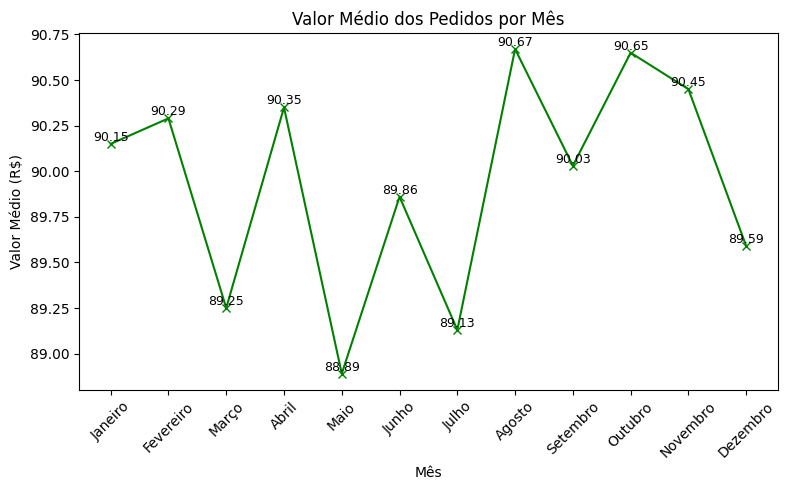

In [232]:
#Parte 5 – Visualização de Dados com Matplotlib
#LINHA

df['mes_num'] = df['data_pedido'].dt.month


valor_por_mes = (
    df.groupby(['mes_num', 'mês_pedido'])['valor_final']
      .mean()
      .round(2)
      .reset_index()
      .sort_values('mes_num')
)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(valor_por_mes['mês_pedido'], valor_por_mes['valor_final'], color="green", marker='x')

for x, y in zip(valor_por_mes['mês_pedido'], valor_por_mes['valor_final']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=9)

ax.set_title('Valor Médio dos Pedidos por Mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Valor Médio (R$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

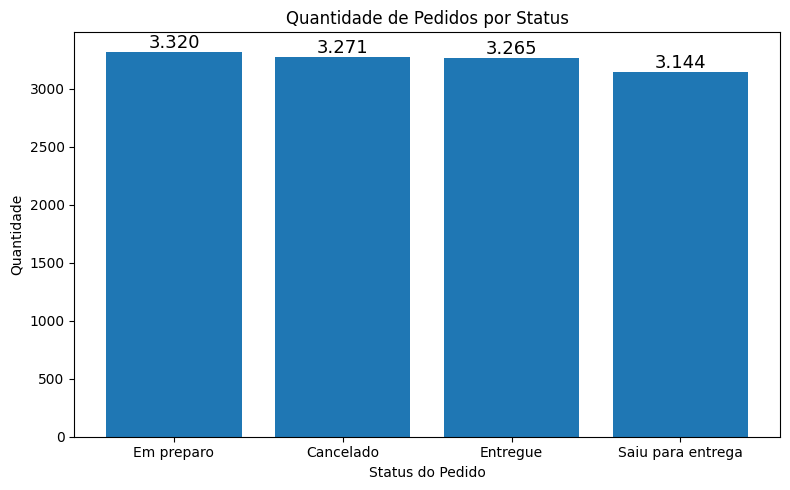

In [233]:
#Parte 5 – Visualização de Dados com Matplotlib
#BARRA

def adicionar_rotulos(ax):
    for p in ax.patches:
        valor = p.get_height()
        ax.annotate(
            f'{valor:,.0f}'.replace(',', '.'),
            (p.get_x() + p.get_width() / 2, valor),
            ha='center',
            va='bottom',
            fontsize=13
        )

status_counts = df['status'].value_counts()

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(status_counts.index, status_counts.values)

ax.set_title('Quantidade de Pedidos por Status')
ax.set_xlabel('Status do Pedido')
ax.set_ylabel('Quantidade')
plt.xticks(rotation=0)

adicionar_rotulos(ax)

plt.tight_layout()
plt.show()

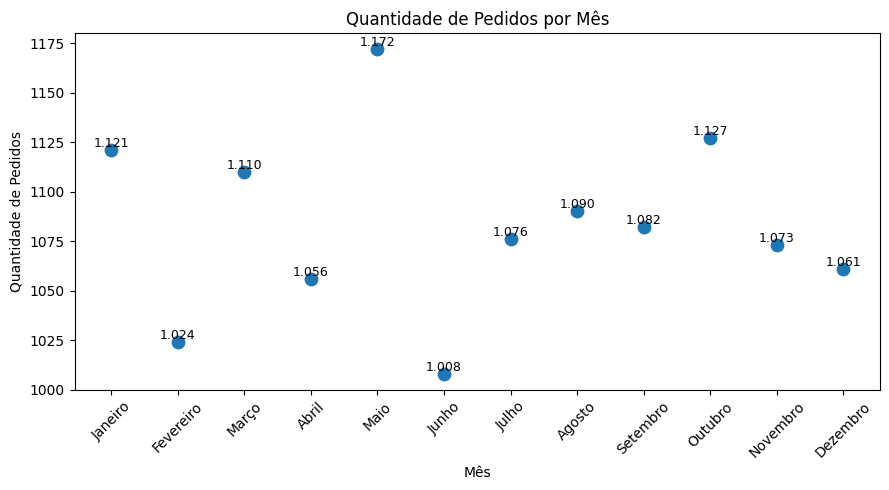

In [234]:
#Parte 5 – Visualização de Dados com Matplotlib
#DISPERSÃO

df['mes_num'] = df['data_pedido'].dt.month

pedidos_mes = (
    df.groupby(['mes_num', 'mês_pedido'])
      .size()
      .reset_index(name='quantidade_pedidos')
      .sort_values('mes_num')
)

fig, ax = plt.subplots(figsize=(9,5))

ax.scatter(
    pedidos_mes['mes_num'],
    pedidos_mes['quantidade_pedidos'],
    s=80
)

ax.set_title('Quantidade de Pedidos por Mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade de Pedidos')

ax.set_xticks(pedidos_mes['mes_num'])
ax.set_xticklabels(pedidos_mes['mês_pedido'], rotation=45)

for _, row in pedidos_mes.iterrows():
    ax.text(
        row['mes_num'],
        row['quantidade_pedidos'],
        f"{row['quantidade_pedidos']:,.0f}".replace(',', '.'),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

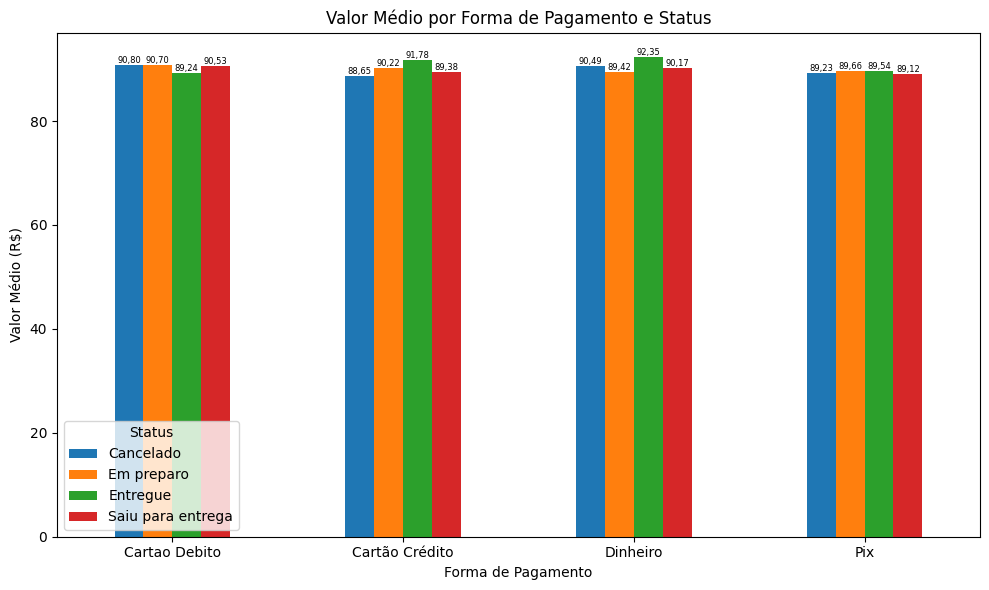

In [235]:
#Parte 5 – Visualização de Dados com Matplotlib
#GRÁFICO DE BARRAS AGRUPADA



def adicionar_rotulos(ax):
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[
                f'{v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
                for v in container.datavalues
            ],
            fontsize=6
        )


agrupado = (
    df.groupby(['forma_pagamento', 'status'])['valor_final']
      .mean()
      .round(2)
      .unstack()
)


fig, ax = plt.subplots(figsize=(10,6))

agrupado.plot(kind='bar', ax=ax)


adicionar_rotulos(ax)

ax.set_title('Valor Médio por Forma de Pagamento e Status')
ax.set_xlabel('Forma de Pagamento')
ax.set_ylabel('Valor Médio (R$)')
ax.legend(title='Status')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()